In [1]:
import pandas as pd
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
hist = pickle.load(open("hist", "rb"))

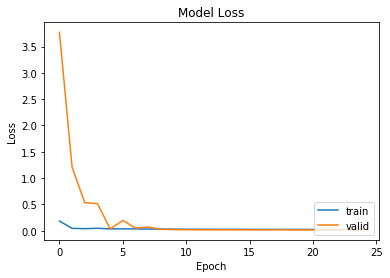

In [3]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"], loc="lower right")

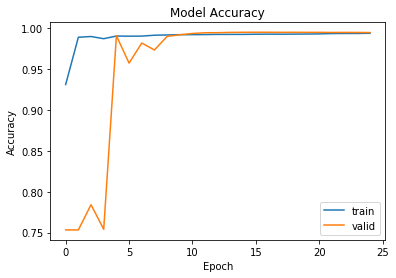

In [4]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"], loc="lower right")

Text(0, 0.5, 'Learning Rate')

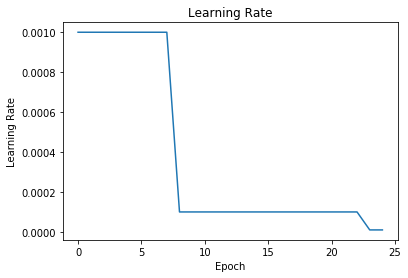

In [5]:
plt.plot(hist["lr"])
plt.title("Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")

In [6]:
X_test = pickle.load(open("X_test", "rb"))
y_test = pickle.load(open("y_test", "rb"))
pred = pickle.load(open("predictions", "rb"))

In [7]:
len(pred)

27

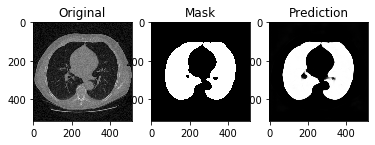

In [16]:
f, ax = plt.subplots(1, 3)
ax[0].imshow(X_test[1][:, :, 0], cmap="gray")
ax[0].title.set_text("Original")
ax[1].imshow(y_test[1][:, :, 0], cmap="gray")
ax[1].title.set_text("Mask")
ax[2].imshow(pred[1][:, :, 0], cmap="gray")
ax[2].title.set_text("Prediction")

In [13]:

def dice_metric(inputs, target):
    intersection = 2.0 * (target * inputs).sum()
    union = target.sum() + inputs.sum()
    if target.sum() == 0 and inputs.sum() == 0:
        return 1.0

    return intersection / union
    

In [15]:
print(dice_metric(y_test[1][:, :, 0], pred[1][:, :, 0]))

0.976272951118775
